<a href="https://colab.research.google.com/github/Pathin220/4105_Project/blob/main/Project_1_Matrix.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [46]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn import metrics
from IPython.display import display
from sklearn.naive_bayes import GaussianNB
from sklearn.decomposition import PCA
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
import sys



#mounting google drive
from google.colab import drive
drive.mount('/content/drive')
file_path = '/content/drive/My Drive/Machine Learning/DataSets/DataSet1/heart.csv'
dataset = pd.DataFrame(pd.read_csv(file_path))
dataset.head()

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


,age,sex,cp,trtbps,chol,fbs,restecg,thalachh,exng,oldpeak,slp,caa,thall,output
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


Accuracy: 0.8360655737704918
Precision: 0.7647058823529411
Recall: 0.9285714285714286
F1 Score: 0.8387096774193549


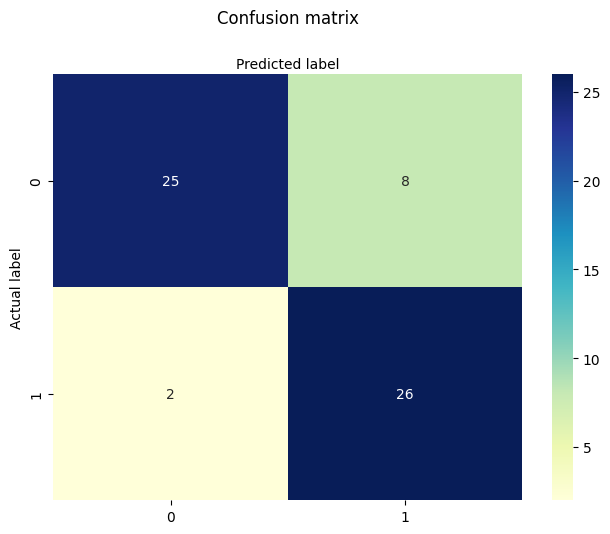

In [47]:

# Assuming 'output' is the target variable, adjust this based on your actual dataset
X = dataset.drop('output', axis=1)
Y = dataset['output']

np.random.seed(17)
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, test_size=0.2, random_state=100)

# Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()

# Min Max or Standard normalize
X_train = scalerMM.fit_transform(X_train)
X_test = scalerMM.transform(X_test)  # Use transform instead of fit_transform for the testing set

classifier = LogisticRegression(random_state=0)
classifier.fit(X_train, Y_train)

Y_pred = classifier.predict(X_test)  # Correct variable name

print("Accuracy:", metrics.accuracy_score(Y_test, Y_pred))
print("Precision:", metrics.precision_score(Y_test, Y_pred))
print("Recall:", metrics.recall_score(Y_test, Y_pred))
print("F1 Score:", metrics.f1_score(Y_test, Y_pred))

# Confusion matrix
cnf_matrix = confusion_matrix(Y_test, Y_pred)

# Plotting the confusion matrix
class_names = [0, 1]
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)

# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu", fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

plt.show()



In [48]:
gnb = GaussianNB()
NB_fit = gnb.fit(X_train, Y_train)
NB_Y_pred=NB_fit.predict(X_test)

print("Accuracy:",metrics.accuracy_score(Y_test, NB_Y_pred))
print("Precision:",metrics.precision_score(Y_test, NB_Y_pred))
print("Recall:",metrics.recall_score(Y_test, Y_pred))
print("F1 Score:",metrics.f1_score(Y_test, NB_Y_pred))

Accuracy: 0.8688524590163934
Precision: 0.8333333333333334
Recall: 0.9285714285714286
F1 Score: 0.8620689655172413


<ipython-input-49-63d4b9f8a90e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(data, ignore_index=True)
<ipython-input-49-63d4b9f8a90e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(data, ignore_index=True)
<ipython-input-49-63d4b9f8a90e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(data, ignore_index=True)
<ipython-input-49-63d4b9f8a90e>:29: FutureWarning: The frame.append method is deprecated and will be removed from pandas in a future version. Use pandas.concat instead.
  PCA_log_results = PCA_log_results.append(data, ignore_index=True)
<ipython-input-49-63d4b9f8a90e>:29: FutureWarning: T

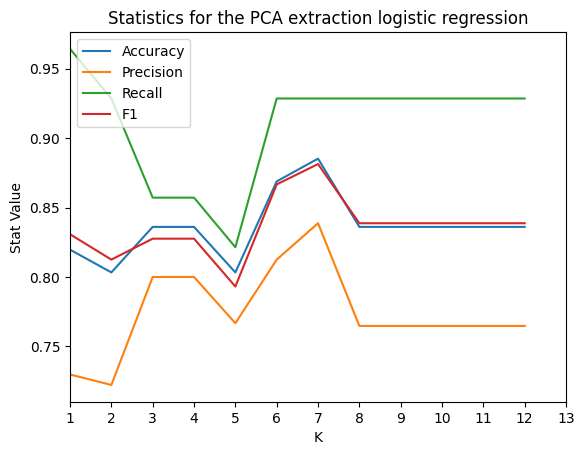

In [49]:
# Scalar normalization
scalerMM = MinMaxScaler()
scalerSS = StandardScaler()

# Min Max or Standard normalize
cancer_X_train = scalerMM.fit_transform(X_train)
cancer_X_test = scalerMM.transform(X_test)

PCA_log_results = pd.DataFrame(columns=['K', 'Accuracy', 'Precision', 'Recall', 'F1'])

from sklearn.decomposition import PCA

K = 13
for i in range(1, K+1):
    pca = PCA(n_components=i)
    principalComponents = pca.fit_transform(cancer_X_train)
    principalComponents_test = pca.transform(cancer_X_test)  # Use transform instead of fit_transform

    classifier = LogisticRegression(random_state=0)
    classifier.fit(principalComponents, Y_train)
    cancer_Y_pred = classifier.predict(principalComponents_test)

    accuracy = metrics.accuracy_score(Y_test, cancer_Y_pred)
    precision = metrics.precision_score(Y_test, cancer_Y_pred)
    recall = metrics.recall_score(Y_test, cancer_Y_pred)
    f1 = metrics.f1_score(Y_test, cancer_Y_pred)

    data = {'K': i, 'Accuracy': accuracy, 'Precision': precision, 'Recall': recall, 'F1': f1}
    PCA_log_results = PCA_log_results.append(data, ignore_index=True)

# Plot stats for PCA/Logistic
fig1, ax = plt.subplots()
ax.plot(PCA_log_results['Accuracy'])
ax.plot(PCA_log_results['Precision'])
ax.plot(PCA_log_results['Recall'])
ax.plot(PCA_log_results['F1'])
ax.legend(['Accuracy', 'Precision', 'Recall', 'F1'])
ax.set_title('Statistics for the PCA extraction logistic regression')
ax.set_xlabel('K')
ax.set_ylabel('Stat Value')
plt.xlim(1, K)
plt.xticks(range(1, K+1))

plt.show()
